In [1]:
#Necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv2D, MaxPooling2D, Flatten, TimeDistributed, Bidirectional, GRU
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

2025-07-31 20:02:17.398400: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753992137.603883      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753992137.661244      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
def fetch_adjusted_close(tickers, start_date, end_date):
    """
    Fetches adjusted close prices for multiple tickers from Yahoo Finance.
    Args:
        tickers (list): List of stock ticker symbols.
        start_date (str): Start date in 'YYYY-MM-DD' format.
        end_date (str): End date in 'YYYY-MM-DD' format.
    Returns:
        pandas.DataFrame: A DataFrame containing the Date column and adjusted close prices for each ticker.
    """
    # Download data from Yahoo Finance
    data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
    # Reset index to keep Date as a column
    data.reset_index(inplace=True)
    # Drop rows with missing values (optional)
    data.dropna(inplace=True)
    return data
#importation of the top leading tech stocks in the USA
tickers = ["AAPL","AMZN","META","MSFT","GOOGL","NVDA"]
start_date = "2018-12-31"
end_date = "2025-06-30"
# Fetch stock data
stock_df = fetch_adjusted_close(tickers, start_date, end_date)
# Display the first few rows
print(stock_df.head())

[*********************100%***********************]  6 of 6 completed

Ticker       Date       AAPL       AMZN      GOOGL        META       MSFT  \
0      2018-12-31  37.574974  75.098503  51.936520  130.374741  95.368011   
1      2019-01-02  37.617851  76.956497  52.419628  134.939713  94.945511   
2      2019-01-03  33.870838  75.014000  50.967827  131.021210  91.452660   
3      2019-01-04  35.316757  78.769501  53.582150  137.197342  95.706039   
4      2019-01-07  35.238144  81.475502  53.475288  137.296783  95.828110   

Ticker      NVDA  
0       3.310103  
1       3.377545  
2       3.173484  
3       3.376801  
4       3.555571  


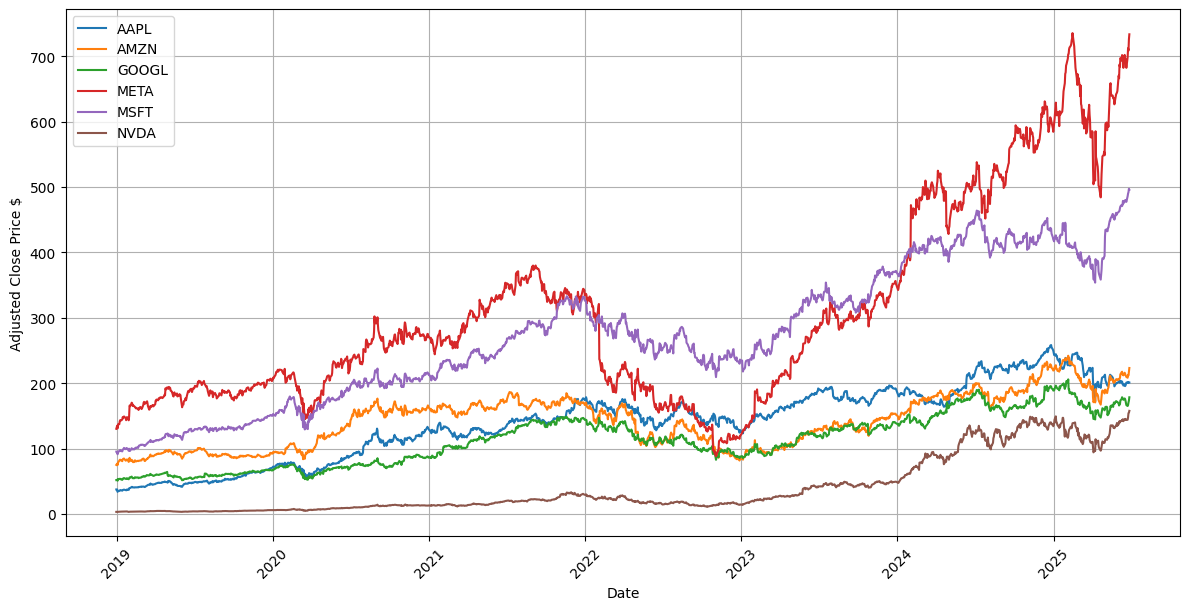

In [3]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
# Plotting
plt.figure(figsize=(12, 6))
for stock in ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA']:
    plt.plot(stock_df['Date'], stock_df[stock], label=stock)
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price $')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

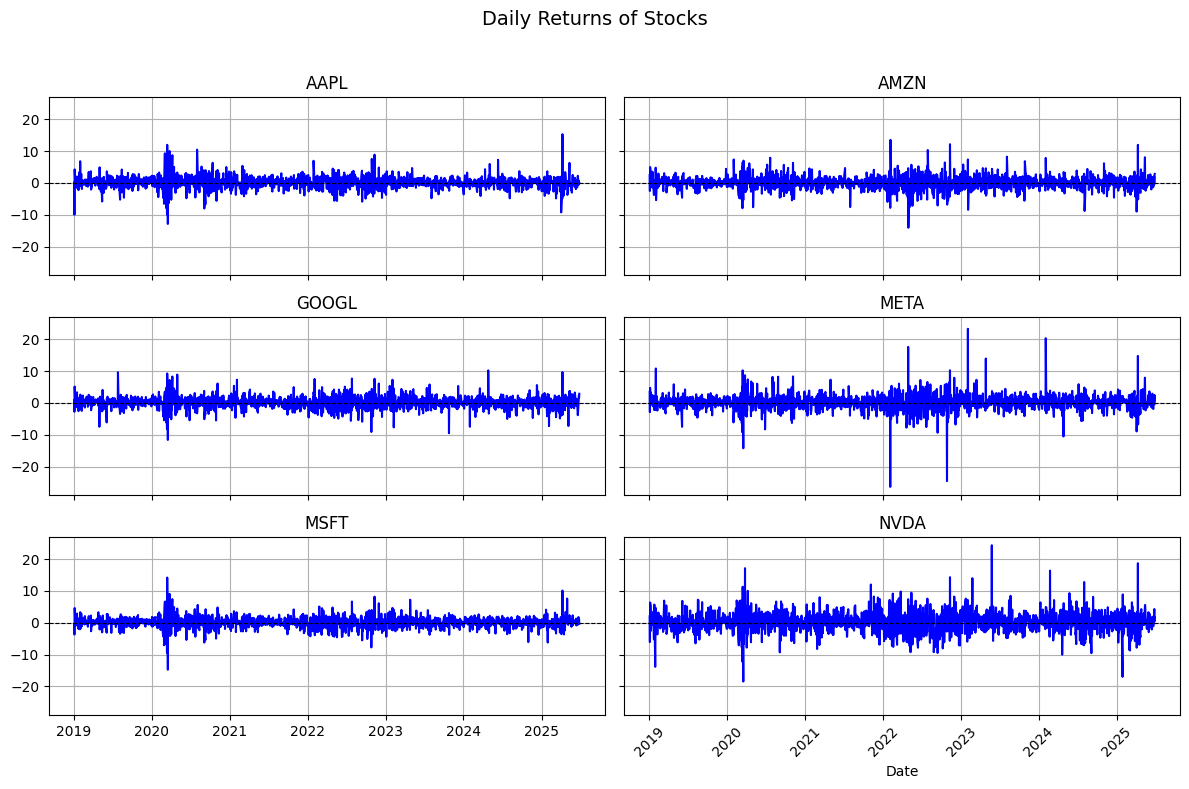

In [4]:
# Calculate daily returns
returns = stock_df.drop(columns='Date').pct_change() * 100  # Daily returns in percentage
returns['Date'] = stock_df['Date']
# List of stocks
stocks = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA']
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 8), sharex=True, sharey=True)
fig.suptitle('Daily Returns of Stocks', fontsize=14)
# Flatten axes for easy iteration
axes = axes.flatten()
# Plot each stock in its own subplot
for i, stock in enumerate(stocks):
    axes[i].plot(returns['Date'], returns[stock], label=stock, color='b')
    axes[i].set_title(stock)
    axes[i].axhline(0, color='black', linestyle='--', linewidth=0.8)
    axes[i].grid(True)
# Formatting
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

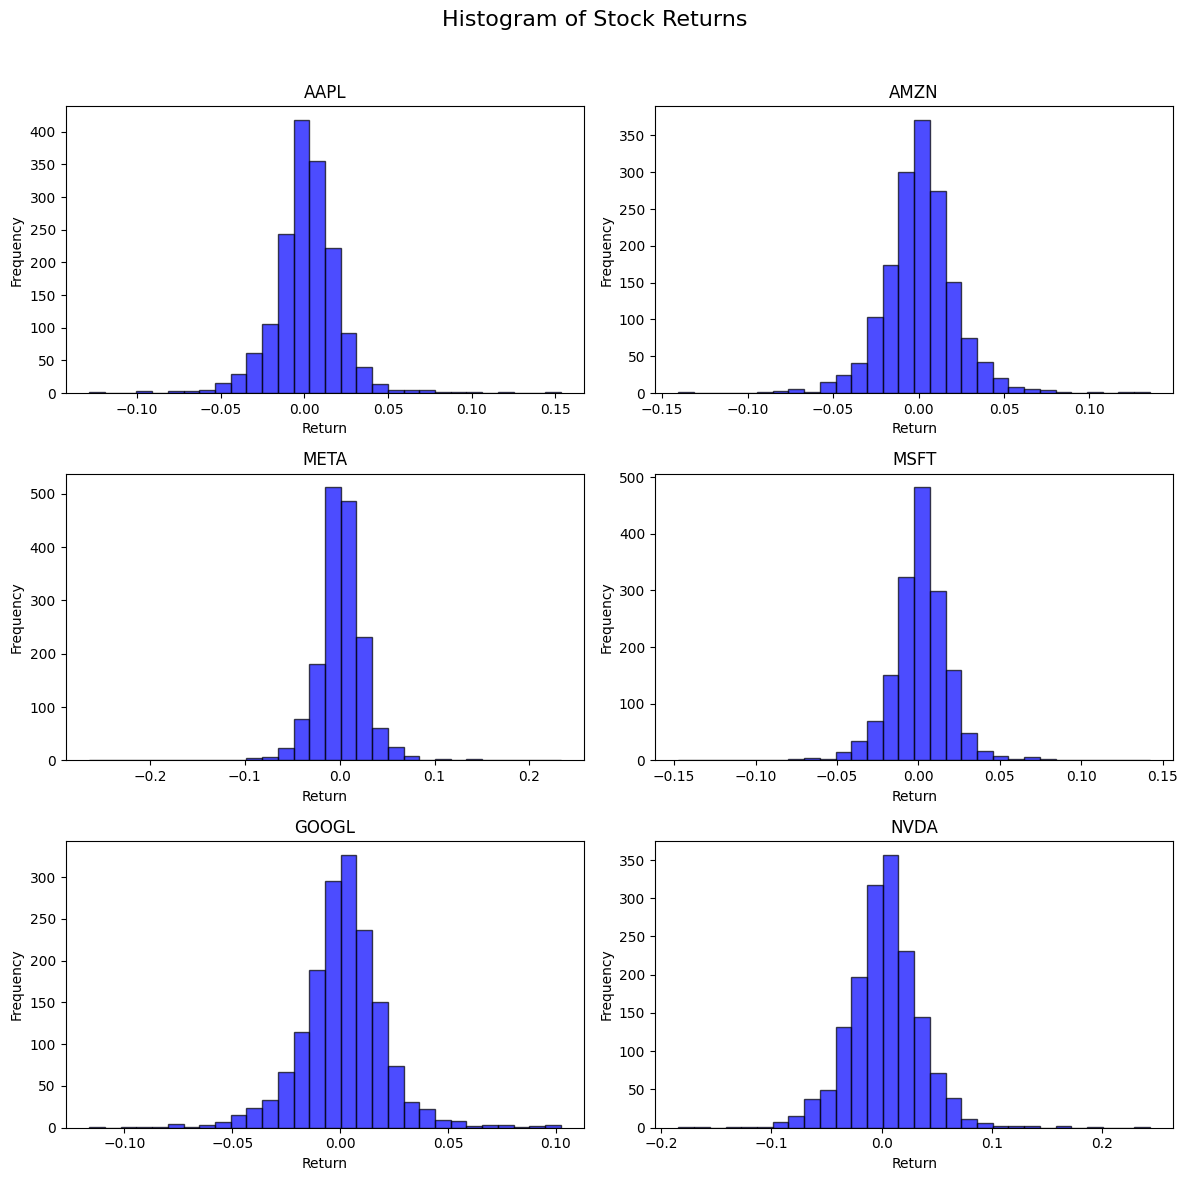

In [5]:
# Set up the subplot grid: 3 rows, 2 columns
returns = stock_df[["AAPL", "AMZN", "META","MSFT","GOOGL","NVDA"]].pct_change().dropna()
fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # Adjust size as needed
fig.suptitle("Histogram of Stock Returns", fontsize=16)
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Plot histograms for each stock
for i, stock in enumerate(returns.columns):
    axes[i].hist(returns[stock], bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes[i].set_title(stock)
    axes[i].set_xlabel("Return")
    axes[i].set_ylabel("Frequency")

# If fewer stocks than subplots, hide the empty axes
for j in range(len(returns.columns), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
plt.show()

Processing ticker: AAPL
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - loss: 0.1497 - val_loss: 0.0386
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0307 - val_loss: 0.0138
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0122 - val_loss: 0.0061
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0068 - val_loss: 0.0026
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0056 - val_loss: 0.0019
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0042 - val_loss: 0.0018
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0045 - val_loss: 0.0016
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0046 - val_loss: 0.0014
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0041 - val_loss: 0.0015
Epoch 10/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0040 - val_loss: 0.0024
Epoch 11/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0045 - val_loss: 0.0024
Epoch 12/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0038 - val_loss: 0.0022
Ep

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - loss: 0.0870 - val_loss: 0.0264
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0218 - val_loss: 0.0061
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0099 - val_loss: 0.0037
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0080 - val_loss: 0.0037
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0059 - val_loss: 0.0037
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0062 - val_loss: 0.0019
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0054 - val_loss: 0.0016
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0045 - val_loss: 0.0018
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0048 - val_loss: 0.0022
Epoch 10/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0043 - val_loss: 0.0018
Epoch 11/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0046 - val_loss: 0.0013
Epoch 12/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0036 - val_loss: 0.0017
Ep

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - loss: 0.0903 - val_loss: 0.0246
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0205 - val_loss: 0.0032
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0056 - val_loss: 0.0041
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0052 - val_loss: 0.0015
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0036 - val_loss: 0.0018
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0042 - val_loss: 0.0017
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0036 - val_loss: 9.7730e-04
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0026 - val_loss: 7.8868e-04
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0026 - val_loss: 5.7318e-04
Epoch 10/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0024 - val_loss: 5.0934e-04
Epoch 11/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0025 - val_loss: 4.9115e-04
Epoch 12/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0023 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - loss: 0.1201 - val_loss: 0.0292
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0247 - val_loss: 0.0148
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0126 - val_loss: 0.0052
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0074 - val_loss: 0.0034
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0062 - val_loss: 0.0019
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0045 - val_loss: 0.0016
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0046 - val_loss: 0.0015
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0046 - val_loss: 0.0014
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0037 - val_loss: 0.0012
Epoch 10/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0036 - val_loss: 0.0011
Epoch 11/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0039 - val_loss: 9.5959e-04
Epoch 12/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0030 - val_loss: 0.001

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - loss: 0.1115 - val_loss: 0.0245
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0210 - val_loss: 0.0073
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0097 - val_loss: 0.0049
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0073 - val_loss: 0.0034
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0054 - val_loss: 0.0024
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0051 - val_loss: 0.0021
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0040 - val_loss: 0.0018
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0049 - val_loss: 0.0017
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0041 - val_loss: 0.0019
Epoch 10/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0045 - val_loss: 0.0016
Epoch 11/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0040 - val_loss: 0.0023
Epoch 12/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0042 - val_loss: 0.0015
Ep

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - loss: 0.0751 - val_loss: 0.0117
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0100 - val_loss: 0.0046
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0058 - val_loss: 0.0026
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0039 - val_loss: 0.0012
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0035 - val_loss: 0.0017
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0033 - val_loss: 0.0015
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0031 - val_loss: 9.6599e-04
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0028 - val_loss: 6.4544e-04
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0028 - val_loss: 9.7824e-04
Epoch 10/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0025 - val_loss: 7.2602e-04
Epoch 11/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0025 - val_loss: 6.1329e-04
Epoch 12/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.002

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

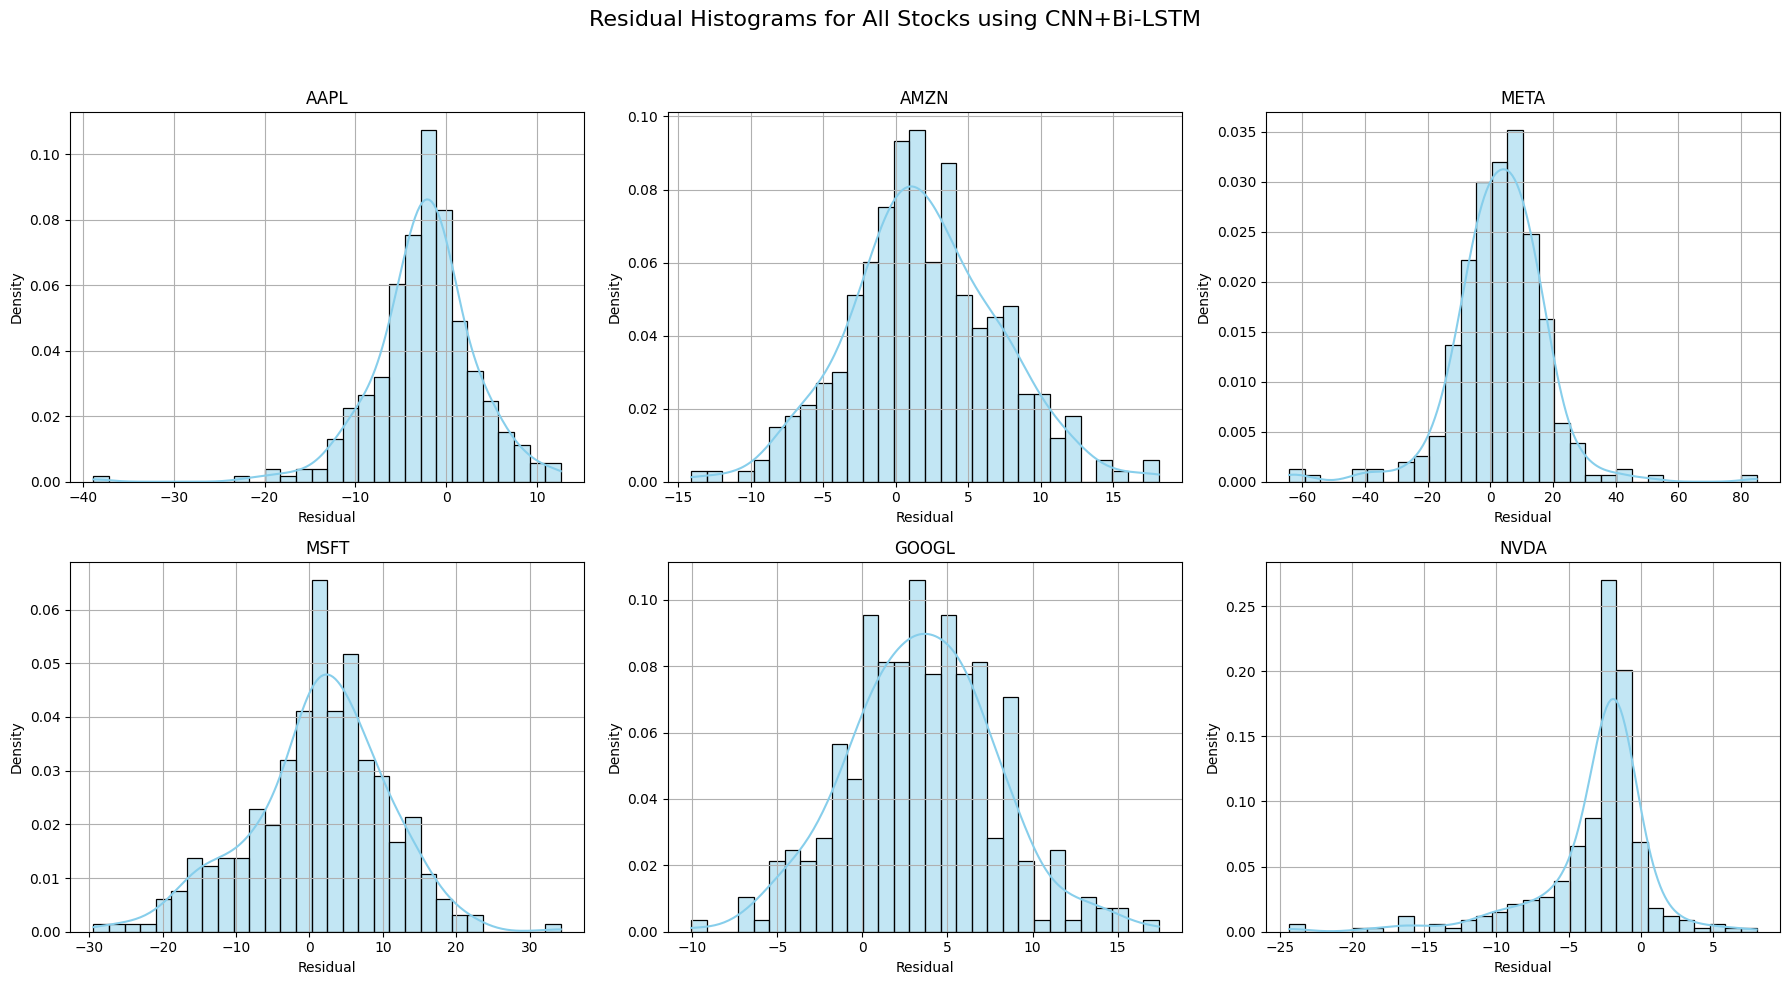

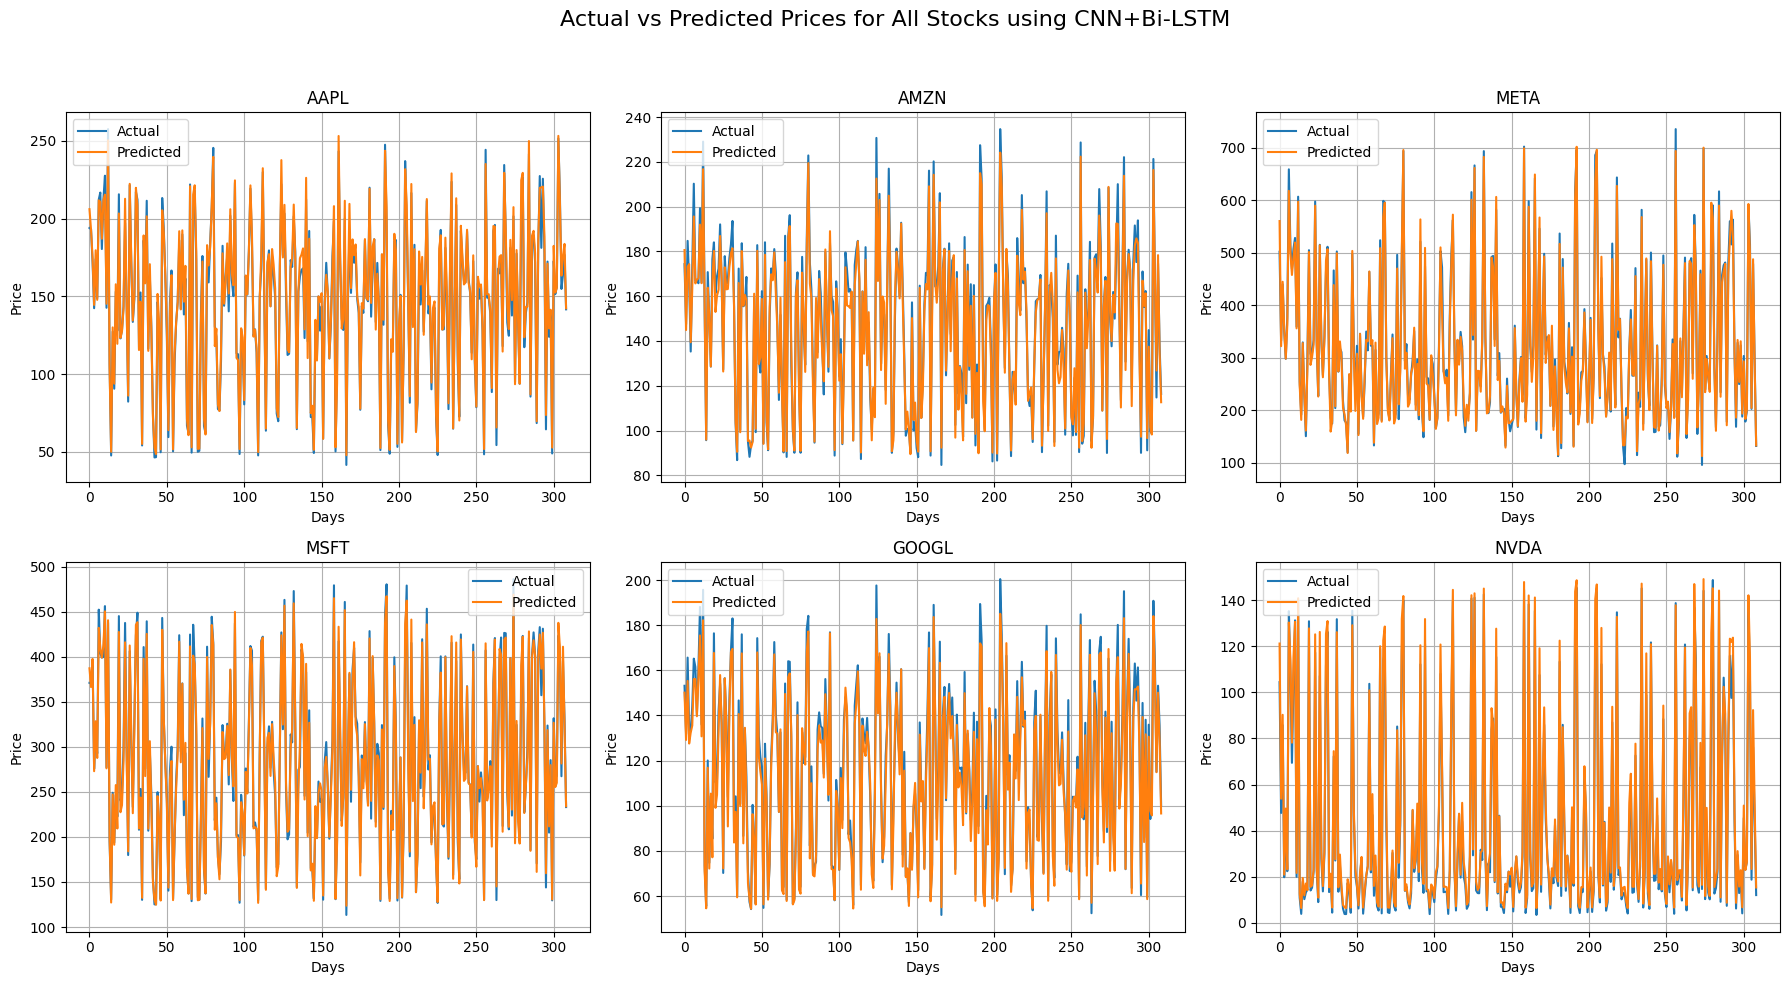

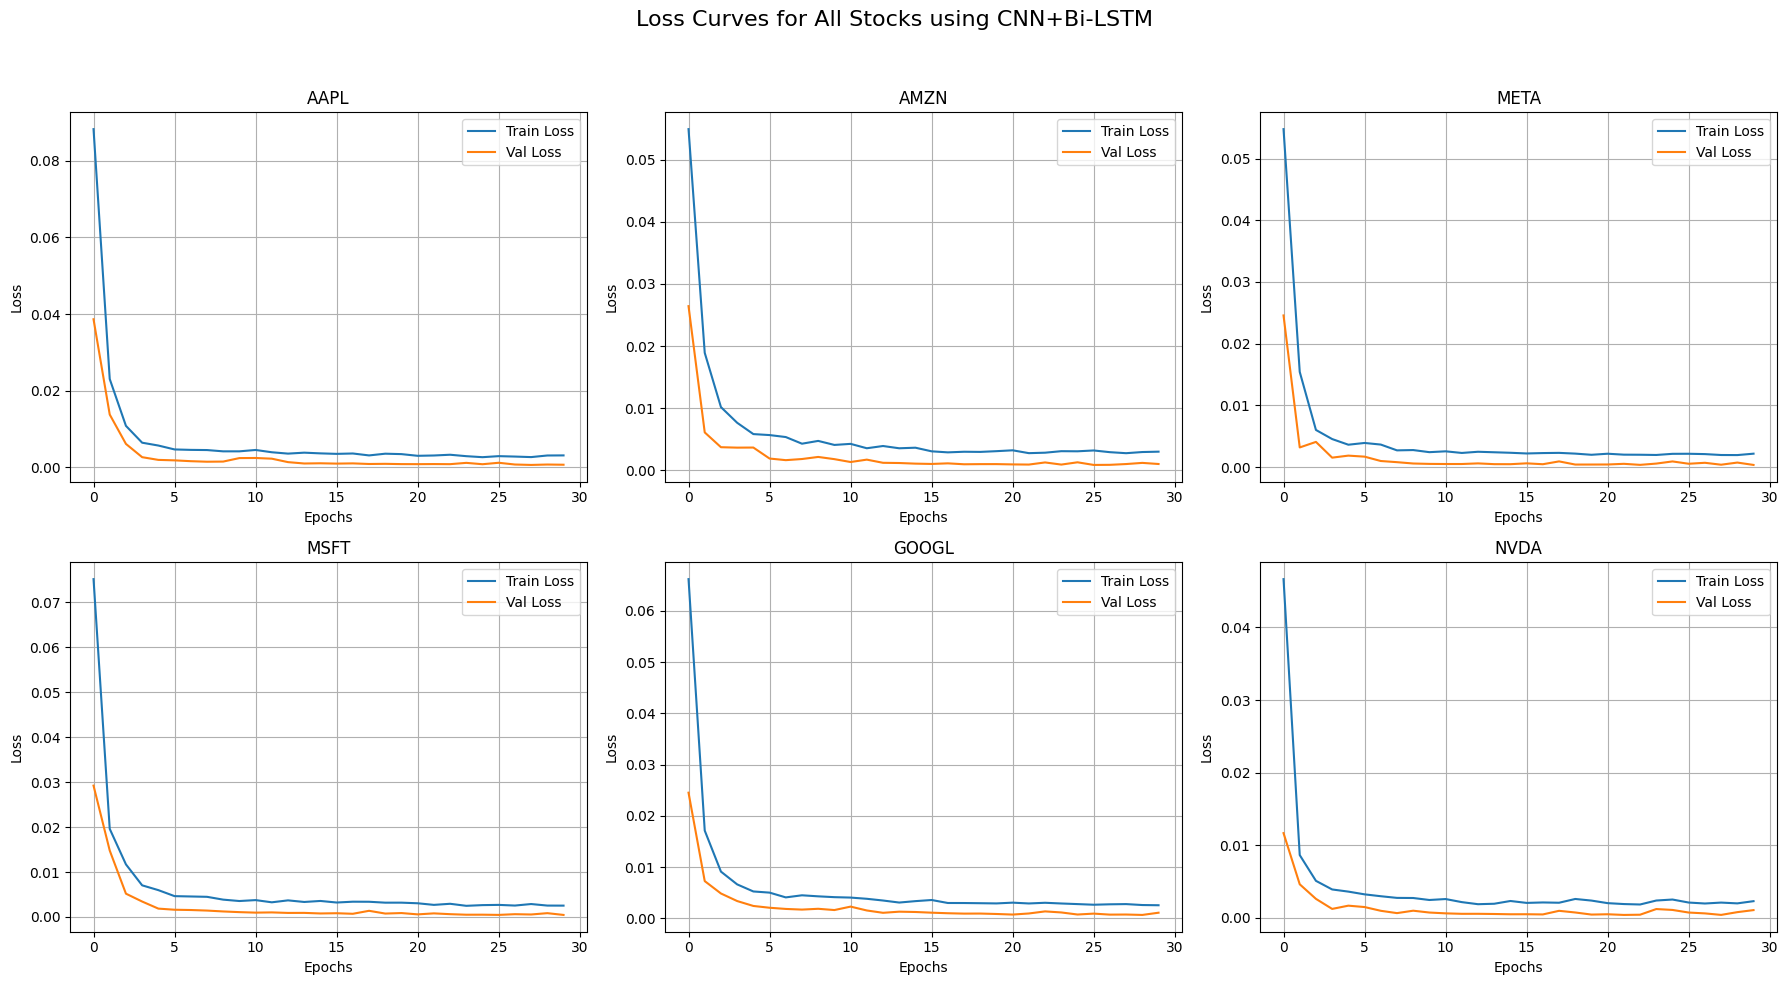

           AAPL        AMZN        META        MSFT       GOOGL        NVDA
0    206.082199  180.627991  560.378479  387.061218  150.100052  121.257805
1    192.924194  144.890625  322.116577  366.274139  129.147415   53.824944
2    174.727829  173.173355  444.738647  397.506409  155.299683   90.290657
3    144.512604  174.331009  355.233093  272.889496  127.560371   20.828970
4    179.661514  139.443787  298.305054  328.323792  132.431427   49.557480
..          ...         ...         ...         ...         ...         ...
304  211.093689  166.584122  496.083038  410.343262  156.702621  114.657249
305  163.360001  126.807335  204.527664  281.429749  114.857819   23.304588
306  176.217117  178.343231  487.644073  411.000854  150.078751   92.339783
307  183.760361  134.990112  289.373779  323.706726  129.357819   51.633507
308  142.366409  112.645081  133.095322  234.019913   96.583443   15.271153

[309 rows x 6 columns]


In [16]:
def fit_cnn_bi_lstm_individual(df, look_back = 90, epochs = 30, batch_size = 128):
    results = {}
    predictions_dict = {}
    scaler = MinMaxScaler(feature_range=(0, 1))
    columns = ["AAPL", "AMZN", "META", "MSFT", "GOOGL", "NVDA"]

    residuals_list = []
    forecast_list = []
    loss_list = []
    for ticker in columns:
        print(f"Processing ticker: {ticker}")
        ticker_data = df[ticker].values.reshape(-1, 1)
        ticker_scaled = scaler.fit_transform(ticker_data)

        def create_dataset(data, look_back):
            X, Y = [], []
            for i in range(look_back, len(data)):
                X.append(data[i - look_back:i, 0])
                Y.append(data[i, 0])
            return np.array(X), np.array(Y)

        X, y = create_dataset(ticker_scaled, look_back)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        X_train = X_train.reshape(X_train.shape[0], look_back, 1, 1, 1)
        X_test = X_test.reshape(X_test.shape[0], look_back, 1, 1, 1)

        cl = Sequential()
        cl.add(TimeDistributed(Conv2D(filters=64, kernel_size=(1, 1), activation='relu'), input_shape=(look_back, 1, 1, 1)))
        cl.add(TimeDistributed(MaxPooling2D(pool_size=(1, 1))))
        cl.add(TimeDistributed(Conv2D(filters=128, kernel_size=(1, 1), activation='relu')))
        cl.add(TimeDistributed(MaxPooling2D(pool_size=(1, 1))))
        cl.add(TimeDistributed(Conv2D(filters=64, kernel_size=(1, 1), activation='relu')))
        cl.add(TimeDistributed(MaxPooling2D(pool_size=(1, 1))))
        cl.add(TimeDistributed(Flatten()))
        cl.add(Bidirectional(LSTM(100, return_sequences=True)))
        cl.add(Dropout(0.5))
        cl.add(Bidirectional(LSTM(100, return_sequences=False)))
        cl.add(Dropout(0.5))
        cl.add(Dense(1))

        optimizer = Adam(learning_rate=0.001)
        cl.compile(optimizer=optimizer, loss='mean_squared_error')

        history = cl.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split  = 0.10, verbose=1)

        y_pred = cl.predict(X_test)
        y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
        y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Residuals
        residuals = y_test_inv.flatten() - y_pred_inv.flatten()

        # Save data for collective plotting
        residuals_list.append((ticker, residuals))
        forecast_list.append((ticker, y_test_inv.flatten(), y_pred_inv.flatten()))
        loss_list.append((ticker, history.history['loss'], history.history['val_loss']))


        # Save predictions and metrics
        predictions_dict[ticker] = y_pred_inv.flatten()
        rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
        mae = mean_absolute_error(y_test_inv, y_pred_inv)
        r_squared = r2_score(y_test_inv, y_pred_inv)
        final_loss = history.history['loss'][-1]

        print(f"{ticker} - RMSE: {rmse}, MAE: {mae}, R-squared: {r_squared}, Loss: {final_loss}")

        results[ticker] = {
            'model': cl,
            'predictions': y_pred_inv,
            'actuals': y_test_inv,
            'residuals': residuals,
            'metrics': {
                'RMSE': rmse,
                'MAE': mae,
                'R-squared': r_squared,
                'Loss': final_loss
            },
            'history': history.history
        }

    # === Plot Residual Histograms ===
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Residual Histograms for All Stocks using CNN+Bi-LSTM', fontsize=16)
    for idx, (ticker, residuals) in enumerate(residuals_list):
        ax = axs[idx // 3, idx % 3]
        sns.histplot(residuals, kde=True, bins=30, stat='density', color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f"{ticker}")
        ax.set_xlabel('Residual')
        ax.set_ylabel('Density')
        ax.grid(True)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # === Plot Forecast vs Actual ===
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Actual vs Predicted Prices for All Stocks using CNN+Bi-LSTM', fontsize=16)
    for idx, (ticker, actuals, predictions) in enumerate(forecast_list):
        ax = axs[idx // 3, idx % 3]
        ax.plot(actuals, label='Actual')
        ax.plot(predictions, label='Predicted')
        ax.set_title(f"{ticker}")
        ax.set_xlabel('Days')
        ax.set_ylabel('Price')
        ax.legend()
        ax.grid(True)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # === Plot Loss Curves ===
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Loss Curves for All Stocks using CNN+Bi-LSTM', fontsize=16)
    for idx, (ticker, loss, val_loss) in enumerate(loss_list):
        ax = axs[idx // 3, idx % 3]
        ax.plot(loss, label='Train Loss')
        ax.plot(val_loss, label='Val Loss')
        ax.set_title(f"{ticker}")
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Loss')
        ax.legend()
        ax.grid(True)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    prediction = pd.DataFrame(predictions_dict)
    return results, prediction
results, prediction = fit_cnn_bi_lstm_individual(stock_df)
# Display the predictions DataFrame
print(prediction)

In [17]:
def calculate_returns(forecast_results):
    forecast_df = pd.DataFrame(forecast_results)
    log_returns = np.log(forecast_df / forecast_df.shift(1)).dropna()
    return log_returns

def simulate_portfolios(log_returns, n_simulations=100000, risk_free_rate=0.04/252):
    n_assets = log_returns.shape[1]
    results = {
        'Returns': [],
        'Volatility': [],
        'Sharpe': [],
        'Weights': []
    }

    mean_returns = log_returns.mean()
    cov_matrix = log_returns.cov()

    for _ in range(n_simulations):
        weights = np.random.random(n_assets)
        weights /= np.sum(weights)

        port_return = np.dot(weights, mean_returns)
        port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        sharpe_ratio = (port_return - risk_free_rate) / port_volatility

        results['Returns'].append(port_return)
        results['Volatility'].append(port_volatility)
        results['Sharpe'].append(sharpe_ratio)
        results['Weights'].append(weights)

    return pd.DataFrame(results), mean_returns, cov_matrix

def get_optimal_portfolios(portfolios_df):
    max_sharpe_idx = portfolios_df['Sharpe'].idxmax()
    min_vol_idx = portfolios_df['Volatility'].idxmin()

    max_sharpe_portfolio = portfolios_df.loc[max_sharpe_idx]
    min_variance_portfolio = portfolios_df.loc[min_vol_idx]

    return max_sharpe_portfolio, min_variance_portfolio

def plot_efficient_frontier(portfolios_df, max_sharpe_portfolio, min_variance_portfolio):
    plt.figure(figsize=(12, 7))
    plt.scatter(portfolios_df['Volatility'], portfolios_df['Returns'], c=portfolios_df['Sharpe'], cmap='viridis', marker='o', alpha=0.4)
    plt.colorbar(label='Sharpe Ratio')
    plt.scatter(max_sharpe_portfolio['Volatility'], max_sharpe_portfolio['Returns'], marker='*', color='r', s=300, label='Max Sharpe Ratio')
    plt.scatter(min_variance_portfolio['Volatility'], min_variance_portfolio['Returns'], marker='X', color='b', s=200, label='Min Variance')
    plt.title('Efficient Frontier using CNN+Bi-LSTM')
    plt.xlabel('Volatility (Std. Dev.)')
    plt.ylabel('Expected Return')
    plt.legend()
    plt.grid(True)
    plt.show()


Maximum Sharpe Ratio Portfolio Weights:
AAPL: 58.44%
AMZN: 1.74%
META: 0.50%
MSFT: 30.77%
GOOGL: 8.47%
NVDA: 0.07%

Minimum Variance Portfolio Weights:
AAPL: 4.02%
AMZN: 75.69%
META: 7.13%
MSFT: 3.38%
GOOGL: 7.42%
NVDA: 2.36%


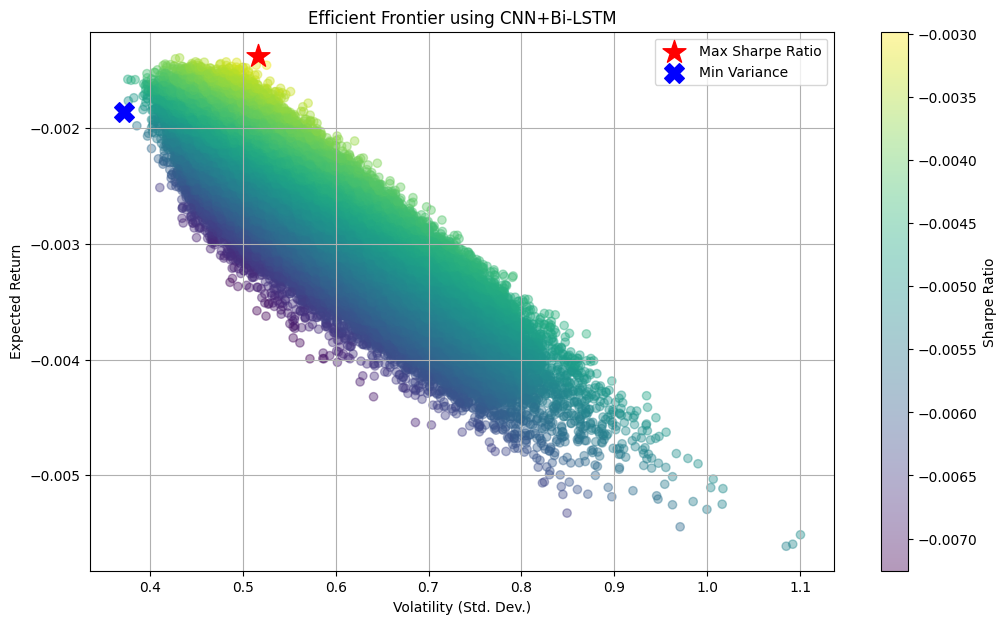

In [18]:
log_returns = calculate_returns(prediction)
portfolios_df, mean_returns, cov_matrix = simulate_portfolios(log_returns)
max_sharpe_portfolio, min_variance_portfolio = get_optimal_portfolios(portfolios_df)
# Show weights nicely
tickers = list(log_returns.columns)
print("\nMaximum Sharpe Ratio Portfolio Weights:")
for t, w in zip(tickers, max_sharpe_portfolio['Weights']):
    print(f"{t}: {w:.2%}")

print("\nMinimum Variance Portfolio Weights:")
for t, w in zip(tickers, min_variance_portfolio['Weights']):
    print(f"{t}: {w:.2%}")
# Plot Efficient Frontier
plot_efficient_frontier(portfolios_df, max_sharpe_portfolio, min_variance_portfolio)

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  1 of 1 completed


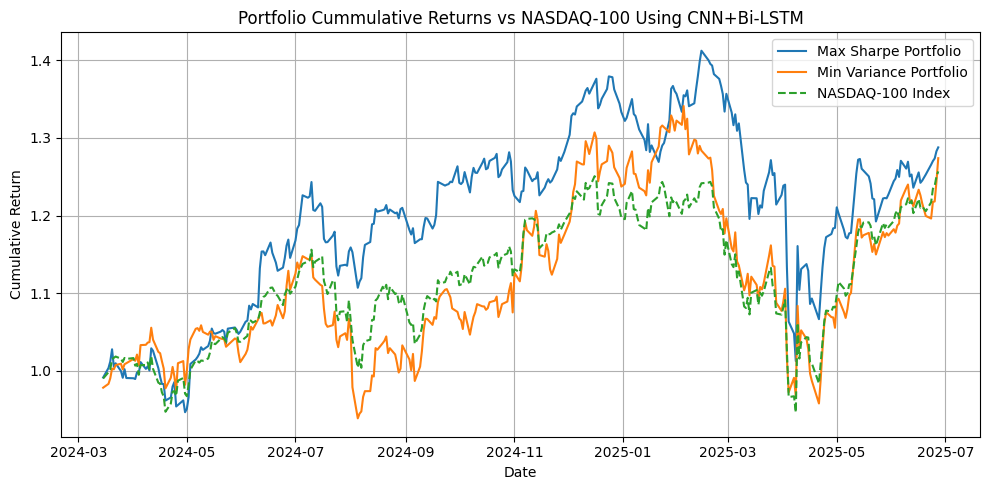

In [19]:
#Initialize the dates
start_date = "2024-03-14"
end_date = "2025-06-30"
tickers = list(log_returns.columns)
actual_prices = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
nasdaq100 = yf.download("^IXIC", start=start_date, end=end_date, auto_adjust=False)['Adj Close']
# Compute daily returns
actual_returns = actual_prices.pct_change().dropna()
nasdaq_returns = nasdaq100.pct_change().dropna()
# Calculate Portfolio Returns
def compute_portfolio_returns(weights, daily_returns):
    return (daily_returns @ weights)
max_sharpe_returns = compute_portfolio_returns(np.array(max_sharpe_portfolio['Weights']), actual_returns)
min_var_returns = compute_portfolio_returns(np.array(min_variance_portfolio['Weights']), actual_returns)
# Compute cumulative returns
max_sharpe_cum = (1 + max_sharpe_returns).cumprod()
min_var_cum = (1 + min_var_returns).cumprod()
nasdaq_cum = (1 + nasdaq_returns).cumprod()
# Plotting the comparison
plt.figure(figsize=(10, 5))
plt.plot(max_sharpe_cum, label="Max Sharpe Portfolio")
plt.plot(min_var_cum, label="Min Variance Portfolio")
plt.plot(nasdaq_cum, label="NASDAQ-100 Index", linestyle='--')
plt.title("Portfolio Cummulative Returns vs NASDAQ-100 Using CNN+Bi-LSTM")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
print(f"Max Sharpe Portfolio: {(float(max_sharpe_cum.iloc[-1]) - 1)*100:.2f}%")
print(f"Min Variance Portfolio: {(float(min_var_cum.iloc[-1]) - 1)*100:.2f}%")
print(f"NASDAQ-100 Index: {(float(nasdaq_cum.iloc[-1]) - 1)*100:.2f}%")

Max Sharpe Portfolio: 28.79%
Min Variance Portfolio: 27.40%
NASDAQ-100 Index: 25.70%


/tmp/ipykernel_36/448517341.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"NASDAQ-100 Index: {(float(nasdaq_cum.iloc[-1]) - 1)*100:.2f}%")
